1. Setup and Imports <a name="1"></a>

First, set up the environment by importing necessary libraries and adjusting the system path to include the module directory.

In [1]:
import os
import sys
import pandas as pd

# Add the path to the 'gfop' directory (adjust the path as needed)
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import the FoodCounts class
from foodcounts import FoodCounts

# Import utility and visualization functions
from utils import food_counts_to_wide, calculate_proportions
from visualization import (
    plot_food_type_distribution,
    box_plot_food_proportions,
    plot_food_proportion_heatmap,
    plot_pca_results,
    plot_explained_variance,
)
from analysis import perform_pca_food_counts

print("Setup complete.")

Setup complete.


2. Loading GNPS Network Data <a name="2"></a>

Load a sample GNPS network file for demonstration purposes.

In [2]:
# Define the path to the sample GNPS network file
gnps_network_path = os.path.join(module_path, "data", "sample_gnps_vegomn.tsv")
print(gnps_network_path)
# Check if the file exists
if not os.path.exists(gnps_network_path):
    raise FileNotFoundError(f"GNPS network file not found at {gnps_network_path}")

# Read the GNPS network data
gnps_network_df = pd.read_csv(gnps_network_path, sep="\t")

# Display the first few rows
print("Sample GNPS Network Data:")
gnps_network_df.head()

c:\Users\amca2\Documents\GitHub\gnps_rdd\gfop\data\sample_gnps_vegomn.tsv
Sample GNPS Network Data:


,AllGroups,DefaultGroups,EvenOdd,G1,G2,G3,G4,G5,G6,GNPSLinkout_Cluster,...,SpectrumID,UniqueFileSources,UniqueFileSourcesCount,cluster index,componentindex,number of spectra,parent mass,precursor charge,precursor mass,sum(precursor intensity)
0,,G1,0,2,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,NaN,NIST_POS_Samp_07-03.mzXML|NIST_POS_Samp_07-02....,2,2,-1,2,301.198,3,101.066,873428.0
1,,"G1,G4",0,56,0,0,26,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,NaN,NIST_POS_Samp_11-01.mzXML|NIST_POS_Samp_10-03....,36,3,-1,82,203.061,2,102.030,285315000.0
2,,"G1,G4",0,54,0,0,13,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,NaN,NIST_POS_Samp_11-01.mzXML|NIST_POS_Samp_10-03....,27,8,467,67,219.033,2,110.016,97144900.0
3,,G4,0,0,0,0,11,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,NaN,G000073461_170522182039.mzXML|G000073462_17052...,3,9,467,11,221.071,2,111.035,45839100.0
4,,"G1,G4",0,1,0,0,25,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,NaN,G86787_1x_RG10_01_23372.mzXML|RB5_RB5_01_49070...,26,10,-1,26,904.661,8,113.958,1133780.0


3. Initializing the FoodCounts Class <a name="3"></a>

Initialize the FoodCounts class by providing the GNPS network file path, sample types, group names, and the number of ontology levels.


In [3]:
# Define the groups
all_groups = ["G1"]  # Study spectrum file groups
some_groups = ["G4"]  # Reference spectrum file groups

# Initialize the FoodCounts class
try:
    food_counts = FoodCounts(
        gnps_network=gnps_network_path,
        sample_types="simple",  # Options: 'simple', 'complex', 'all'
        all_groups=all_groups,
        some_groups=some_groups,
    )
    print("FoodCounts object initialized successfully.")
except ValueError as e:
    print(f"Error initializing FoodCounts: {e}")

FoodCounts object initialized successfully.


4. Generating Food Counts and visualize attributes

After initialization, the FoodCounts object automatically generates food counts for all levels.

In [4]:
# Access the generated food counts
counts = food_counts.counts
# Display the first few rows of the counts
print("Generated Food Counts (first 5 rows):")
food_counts.counts

Generated Food Counts (first 5 rows):


,filename,food_type,count,level,group
0,NIST_POS_Samp_07-03.mzXML,11442.G72441,11,0,G1
1,NIST_POS_Samp_07-02.mzXML,11442.G72441,9,0,G1
2,NIST_POS_Samp_11-01.mzXML,11442.G72441,13,0,G1
3,NIST_POS_Samp_10-03.mzXML,11442.G72441,12,0,G1
4,NIST_POS_Samp_16-03.mzXML,11442.G72441,10,0,G1
...,...,...,...,...,...
92155,NIST_POS_Samp_09-03.mzXML,zuchini blossom,0,6,G1
92156,NIST_POS_Samp_15-02.mzXML,zuchini blossom,0,6,G1
92157,NIST_POS_Samp_10-01.mzXML,zuchini blossom,5,6,G1
92158,NIST_POS_Samp_09-01.mzXML,zuchini blossom,0,6,G1


In [5]:
food_counts.sample_types.head()

,sample_name,sample_type_group1,sample_type_group2,sample_type_group3,sample_type_group4,sample_type_group5,sample_type_group6
filename,,,,,,,
72475_1x_BC9_01_17418.mzXML,11442.G72475,plant,vegetable/herb,vegetable/herb,vegetable,garlic,garlic
72497_1x_BD7_01_17434.mzXML,11442.G72497,plant,fruit,fleshy fruit,pepo,melon,galia
72500_1x_BG3_01_17471.mzXML,11442.G72500,plant,fruit,fleshy fruit,pome,apple,apple
72504_1x_BH8_01_17502.mzXML,11442.G72504,plant,fruit,fleshy fruit,multifruit,fig,turkish fig
72507_1x_BH9_01_17503.mzXML,11442.G72507,algae,algae,seaweed,seaweed,dulse,dulse


In [6]:
food_counts.sample_metadata.sample(10)

,group,filename
4,G1,NIST_POS_Samp_16-03.mzXML
34,G1,NIST_POS_Samp_09-01.mzXML
8,G1,NIST_POS_Samp_09-02.mzXML
13,G1,NIST_POS_Samp_18-02.mzXML
11,G1,NIST_POS_Samp_14-03.mzXML
32,G1,NIST_POS_Samp_15-02.mzXML
3,G1,NIST_POS_Samp_10-03.mzXML
12,G1,NIST_POS_Samp_17-01.mzXML
17,G1,NIST_POS_Samp_14-02.mzXML
9,G1,NIST_POS_Samp_08-03.mzXML


5. Filtering Food Counts
Markdown Cell:

Filter the food counts by specific food types and ontology levels. Also test proportion calculation

In [7]:
# Filter counts for level 3
level_3_counts = food_counts.filter_counts(level=3)

print("Filtered Food Counts at Level 3 (first 5 rows):")
level_3_counts.head()

Filtered Food Counts at Level 3 (first 5 rows):


,filename,food_type,count,level,group
67284,NIST_POS_Samp_07-03.mzXML,dairy,1247,3,G1
67285,NIST_POS_Samp_07-02.mzXML,dairy,1207,3,G1
67286,NIST_POS_Samp_11-01.mzXML,dairy,1137,3,G1
67287,NIST_POS_Samp_10-03.mzXML,dairy,1101,3,G1
67288,NIST_POS_Samp_16-03.mzXML,dairy,1090,3,G1


In [8]:
# Filter counts for specific food types at level 3
food_types = ["legume", "honey"]
filtered_counts = food_counts.filter_counts(food_types=food_types, level=3)

print(f"Filtered Food Counts for {food_types} at Level 3 (sample 5 rows):")
filtered_counts.sample(5)

Filtered Food Counts for ['legume', 'honey'] at Level 3 (sample 5 rows):


,filename,food_type,count,level,group
67491,NIST_POS_Samp_13-01.mzXML,honey,0,3,G1
67465,NIST_POS_Samp_07-02.mzXML,honey,0,3,G1
67596,NIST_POS_Samp_14-01.mzXML,legume,364,3,G1
67583,NIST_POS_Samp_14-03.mzXML,legume,346,3,G1
67476,NIST_POS_Samp_17-01.mzXML,honey,52,3,G1


6. Converting Counts to Wide Format and calculating proportions <a name="6"></a>

Convert the long-format counts to a wide-format DataFrame using the utility function.

In [9]:
# Convert counts to wide format for level 3
try:
    wide_counts = food_counts_to_wide(filtered_counts)
    print("Wide-format Food Counts (first 5 rows):")
    wide_counts.head()
except ValueError as e:
    print(f"Error converting to wide format: {e}")
wide_counts.head()

Wide-format Food Counts (first 5 rows):


,honey,legume,group
filename,,,
NIST_POS_Samp_07-01.mzXML,0.0,477.0,G1
NIST_POS_Samp_07-02.mzXML,0.0,338.0,G1
NIST_POS_Samp_07-03.mzXML,0.0,404.0,G1
NIST_POS_Samp_08-01.mzXML,0.0,477.0,G1
NIST_POS_Samp_08-02.mzXML,0.0,374.0,G1


In [10]:
calculate_proportions(counts, 4).head()

,ant,berry,butter,cheese,citrus,corn husk,cow,cream,drupe,drupe_aggregate,...,seaweed,seed,shellfish,sugarcane,tea/infusion,vegetable,worm,yeast,yogurt,group
filename,,,,,,,,,,,,,,,,,,,,,
NIST_POS_Samp_07-01.mzXML,0.0,0.246345,0.0,0.009379,0.022897,0.009655,0.079862,0.0,0.021793,0.0,...,0.008414,0.0,0.008276,0.007310,0.060069,0.062414,0.000000,0.0,0.069793,G1
NIST_POS_Samp_07-02.mzXML,0.0,0.240357,0.0,0.012257,0.022170,0.012257,0.093097,0.0,0.020728,0.0,...,0.009193,0.0,0.008201,0.007480,0.049928,0.056417,0.000000,0.0,0.076424,G1
NIST_POS_Samp_07-03.mzXML,0.0,0.224737,0.0,0.011864,0.024232,0.012032,0.087674,0.0,0.021540,0.0,...,0.008835,0.0,0.008835,0.007657,0.046361,0.060076,0.000000,0.0,0.075053,G1
NIST_POS_Samp_08-01.mzXML,0.0,0.244350,0.0,0.009139,0.025080,0.010485,0.089621,0.0,0.022600,0.0,...,0.007935,0.0,0.007722,0.006376,0.051718,0.060999,0.004747,0.0,0.064329,G1
NIST_POS_Samp_08-02.mzXML,0.0,0.236408,0.0,0.011599,0.024146,0.011757,0.089166,0.0,0.020832,0.0,...,0.009153,0.0,0.007496,0.007654,0.053578,0.064862,0.000000,0.0,0.068966,G1


7. Updating Groups from Metadata <a name="7"></a>

In [11]:
# Assume we have a metadata file with updated group information
metadata_file = os.path.join(module_path, "data", "veg_omn_metadata.csv")

merge_column = "new_group"

try:
    food_counts.update_groups(metadata_file, merge_column)
    print("Groups updated successfully.")
except ValueError as e:
    print(f"Error updating groups: {e}")

food_counts.counts.sample(5)

Groups updated successfully.


,filename,food_type,count,level,group
61035,NIST_POS_Samp_12-03.mzXML,G96472,5,0,G2
73150,NIST_POS_Samp_09-01.mzXML,"ahi tuna, meat",0,6,G1
85585,NIST_POS_Samp_18-02.mzXML,pistachio,0,6,G2
32541,NIST_POS_Samp_10-01.mzXML,11442.G87330,5,0,G2
83480,NIST_POS_Samp_15-02.mzXML,"merlot, red",10,6,G1


In [12]:
food_counts.sample_metadata.sample(10)

,group,filename
19,G2,NIST_POS_Samp_10-02.mzXML
7,G1,NIST_POS_Samp_13-03.mzXML
0,G1,NIST_POS_Samp_07-03.mzXML
22,G1,NIST_POS_Samp_15-01.mzXML
2,G2,NIST_POS_Samp_11-01.mzXML
27,G1,NIST_POS_Samp_13-01.mzXML
29,G2,NIST_POS_Samp_17-03.mzXML
12,G2,NIST_POS_Samp_17-01.mzXML
5,G2,NIST_POS_Samp_17-02.mzXML
26,G2,NIST_POS_Samp_11-02.mzXML


8. Visualizing Food Type Distribution <a name="8"></a>

In [13]:
# Plot the distribution of food types at level 3
# Filter counts for level 3
fig = plot_food_type_distribution(
    food_counts_instance=food_counts, level=1, group_by=True, library="plotly"
)

# Display the plot
fig

In [14]:
fig_boxplot = box_plot_food_proportions(
    food_counts, level=3, group_by=True, library="plotly", food_types=["meat"]
)
fig_boxplot.show()

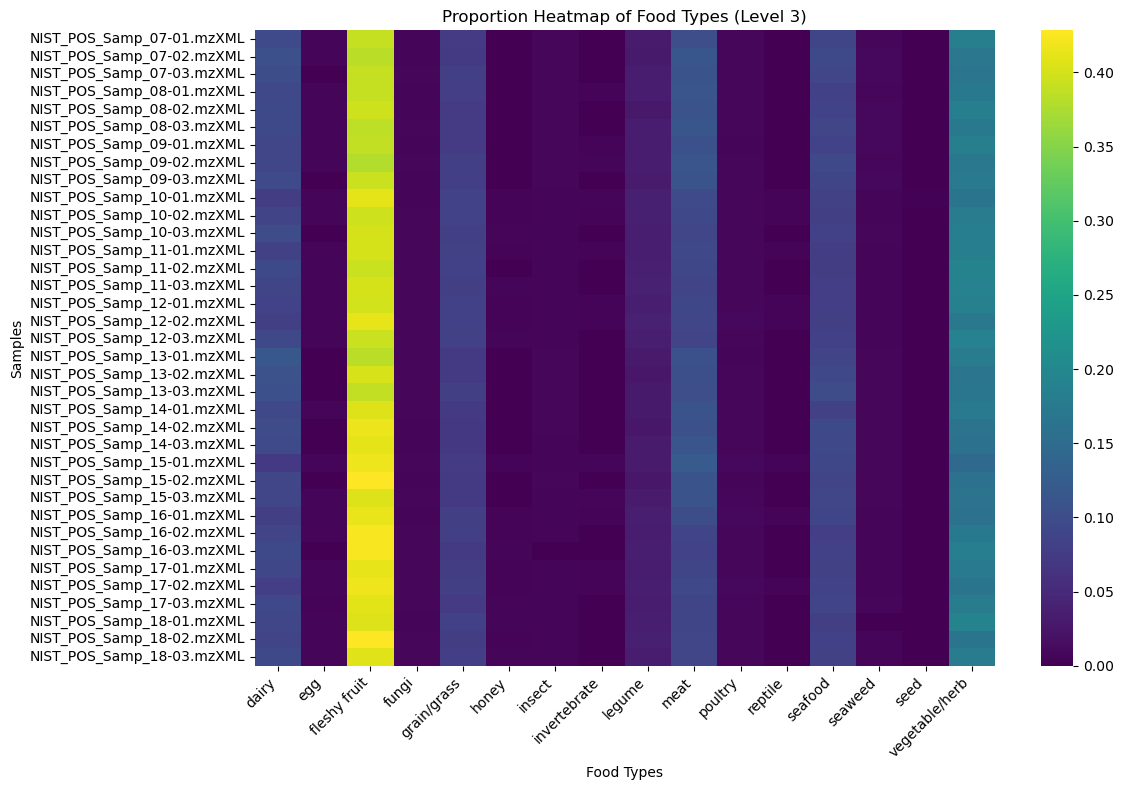

C:\Users\amca2\AppData\Local\Temp\ipykernel_3688\438913536.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



In [15]:
fig_heatmap = plot_food_proportion_heatmap(
    food_counts_instance=food_counts, library="sns"
)
fig_heatmap.show()

In [19]:
pca_df, explained_variance = perform_pca_food_counts(
    food_counts_instance=food_counts, level=0
)

In [20]:
plot_explained_variance(explained_variance)

In [21]:
plot_pca_results(pca_df, explained_variance, library="plotly")